In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.cluster import KMeans

In [2]:
from tqdm import tqdm
import matplotlib as mpl
import matplotlib.pyplot as plt

# Read and Clean the modified CSV

In [3]:
# modified 'saito_1.csv' to readable for pandas in advance
df = pd.read_csv('saito_1_modified.csv')

In [4]:
df.head(7)

,Frame,Time (Seconds),X_1,Y_1,Z_1,X_2,Y_2,Z_2,X_3,Y_3,...,Z_5,X_6,Y_6,Z_6,X_7,Y_7,Z_7,X_8,Y_8,Z_8
0,0,0.00,0.502240,1.125738,0.309557,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,0.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,0.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5,0.05,0.502478,1.125559,0.311379,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,6,0.06,0.502492,1.125586,0.311807,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.columns

Index(['Frame', 'Time (Seconds)', 'X_1', 'Y_1', 'Z_1', 'X_2', 'Y_2', 'Z_2',
       'X_3', 'Y_3', 'Z_3', 'X_4', 'Y_4', 'Z_4', 'X_5', 'Y_5', 'Z_5', 'X_6',
       'Y_6', 'Z_6', 'X_7', 'Y_7', 'Z_7', 'X_8', 'Y_8', 'Z_8'],
      dtype='object')

In [6]:
# concatenate and clean 
def clean(axis):
    frame = 5  # initial frame is 5
    data = []
    for column in tqdm(range(8)):
        column += 1
        column_name = axis+'_'+str(column)
        if column == 3:  # Note: there are not data
            pass
        else:
            while True:    
                if frame == 10030:
                    break
                elif df[column_name][frame] == df[column_name][frame]:  # if not NaN, append
                    data.append(df[column_name][frame])
                    frame += 1
                else:  # if NaN, use mean or break
                    flag = 0
                    for i in range(10):
                        if df[column_name][frame+i] == df[column_name][frame+i]:  
                            dummy = (data[-1] + df[column_name][frame + i]) / 2
                            data.append(dummy)
                            frame += 1
                            flag = 1
                            break
                    if flag == 0:
                        break
    return data

In [7]:
dataX = clean(axis='X')
dataY = clean(axis='Y')
dataZ = clean(axis='Z')

100%|██████████| 8/8 [00:00<00:00, 26.52it/s]


In [8]:
dataT = list(df['Time (Seconds)'][5:10030])

In [9]:
len(dataX), len(dataY), len(dataZ), len(dataT)

(10025, 10025, 10025, 10025)

In [10]:
data = pd.DataFrame({
    'Time': np.array(dataT),
    'X': np.array(dataX),
    'Y': np.array(dataY),
    'Z': np.array(dataZ)
})

In [11]:
data.head()

,Time,X,Y,Z
0,0.05,0.502478,1.125559,0.311379
1,0.06,0.502492,1.125586,0.311807
2,0.07,0.502492,1.125569,0.312193
3,0.08,0.502476,1.125535,0.312576
4,0.09,0.502216,1.125533,0.313068


# Analize the data

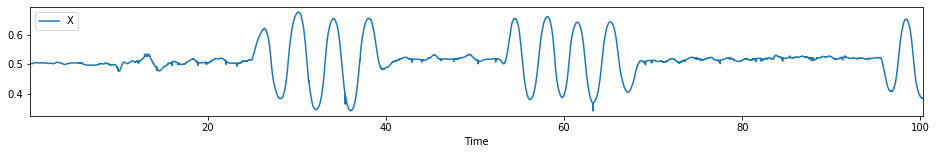

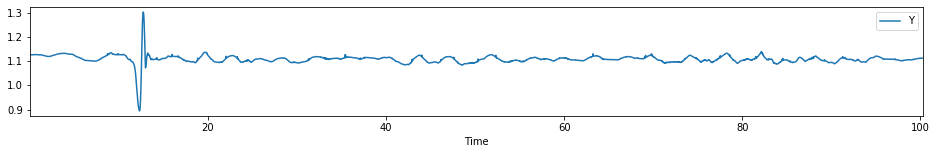

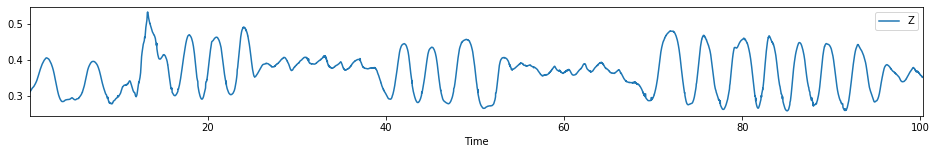

In [13]:
data.plot(x='Time', y='X', figsize=(16,2))
data.plot(x='Time', y='Y', figsize=(16,2))
data.plot(x='Time', y='Z', figsize=(16,2))

From the graph, the displacement in the X-axis direction and the displacement in the Z-axis direction seem to be important. i.e. I assume that the displacement in the X-axis direction is affected by moving lateral movement of the body and displacement in the Y-axis direction is affected by moving vertical movement of the body.

In [12]:
# use k-means to encode
# Note: 'k=3' seems to be good
k = 3
scaledX = np.array(dataX).reshape(-1, 1)
predX = KMeans(n_clusters=k).fit_predict(scaledX)
scaledZ = np.array(dataZ).reshape(-1, 1)
predZ = KMeans(n_clusters=k).fit_predict(scaledZ)

In [13]:
# set the most common value to 0
def shaping(pred):
    c0 = np.count_nonzero(pred==0)
    c1 = np.count_nonzero(pred==1)
    c2 = np.count_nonzero(pred==2)
    box = [c0, c1, c2]
    if max(box) == c0:
        pass
    elif max(box) == c1:
        predX[pred==0] = -1
        predX[pred==1] = 0
        predX[pred==-1] = 1
    return pred

In [14]:
predX = shaping(pred=predX)
predZ = shaping(pred=predZ)
data['predX'] = predX
data['predZ'] = predZ

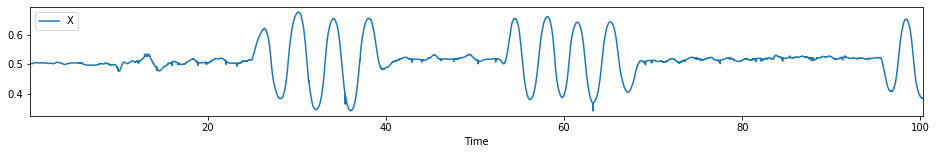

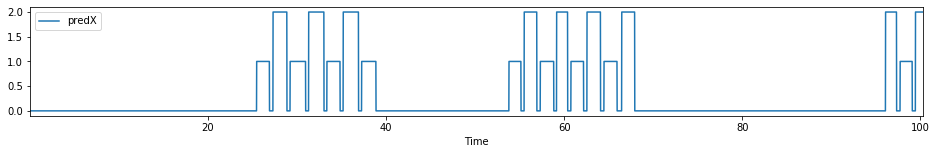

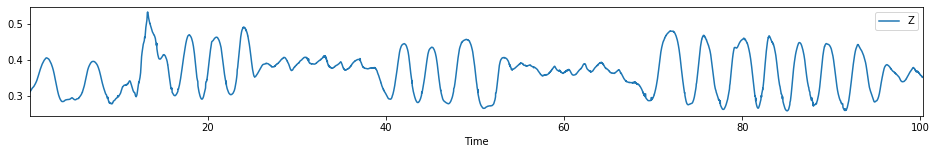

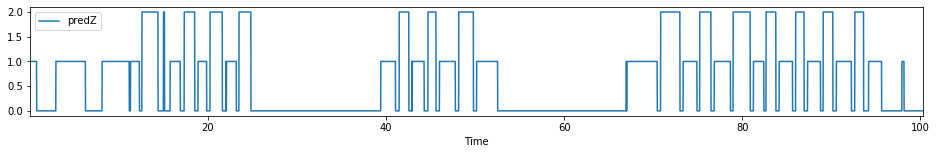

In [17]:
data.plot(x='Time', y='X', figsize=(16,2))
data.plot(x='Time', y='predX', figsize=(16,2))
data.plot(x='Time', y='Z', figsize=(16,2))
data.plot(x='Time', y='predZ', figsize=(16,2))

In predX and predZ, it can be considered as moving when the value is not 0 in each axis direction.

In [15]:
moveT_lateral = data.Time[predX!=0]
moveT_vartical = data.Time[predZ!=0]

# Extraction

In [16]:
# if it can extract the mascle activity and floor reaction force by the move phase, this task is done
# for example, use 'EMG_saito_1.csv' and extract lateral movement phase time
sample = pd.read_csv('EMG_saito_1.csv')

In [17]:
sample.head()

,X[s],Trigno IM sensor 1: EMG 1 (IM),X[s].1,Trigno IM sensor 1: Acc 1.X (IM),X[s].2,Trigno IM sensor 1: Acc 1.Y (IM),X[s].3,Trigno IM sensor 1: Acc 1.Z (IM),X[s].4,Trigno IM sensor 1: Gyro 1.X (IM),...,X[s].55,Trigno IM sensor 6: Gyro 6.Y (IM),X[s].56,Trigno IM sensor 6: Gyro 6.Z (IM),X[s].57,Trigno IM sensor 6: Mag 6.X (IM),X[s].58,Trigno IM sensor 6: Mag 6.Y (IM),X[s].59,Trigno IM sensor 6: Mag 6.Z (IM)
0,0.0000,0.0,0.00000,0.0,0.00000,0.0,0.00000,0.0,0.00000,0.0,...,0.00000,0.0,0.00000,0.0,0.0000,0.0,0.0000,0.0,0.0000,0.0
1,0.0009,0.0,0.00675,0.0,0.00675,0.0,0.00675,0.0,0.00675,0.0,...,0.00675,0.0,0.00675,0.0,0.0135,0.0,0.0135,0.0,0.0135,0.0
2,0.0018,0.0,0.01350,0.0,0.01350,0.0,0.01350,0.0,0.01350,0.0,...,0.01350,0.0,0.01350,0.0,0.0270,0.0,0.0270,0.0,0.0270,0.0
3,0.0027,0.0,0.02025,0.0,0.02025,0.0,0.02025,0.0,0.02025,0.0,...,0.02025,0.0,0.02025,0.0,0.0405,-377.3,0.0405,162.9,0.0405,200.7
4,0.0036,0.0,0.02700,0.0,0.02700,0.0,0.02700,0.0,0.02700,0.0,...,0.02700,0.0,0.02700,0.0,0.0540,-377.0,0.0540,162.4,0.0540,200.3


In [18]:
sample['X[s].1'][:5]

0    0.00000
1    0.00675
2    0.01350
3    0.02025
4    0.02700
Name: X[s].1, dtype: float64

In [19]:
# Note: the device used to analize the movement of center of gravity can sample about 100Hz,
#       but the device used to analize the EMG can sample more times than it.
#       so it have to be done downsampling
rounded = sample['X[s].1'].round(2)
index = rounded[~rounded.duplicated()].index
sampleT = rounded[~rounded.duplicated()]

In [20]:
print(sampleT.head())
print(index[:5])

0    0.00
1    0.01
3    0.02
4    0.03
6    0.04
Name: X[s].1, dtype: float64
Int64Index([0, 1, 3, 4, 6], dtype='int64')


In [21]:
ref = list(moveT_lateral)
sub = list(sampleT)
flags = []
for i in tqdm(range(len(sub))):
    end = 0
    for j in range(len(ref)):
        if sub[i] == ref[j]:
            flags.append(1)
            end = 1
            break
    if end == 0:
        flags.append(0)
flags = np.array(flags)

100%|██████████| 9006/9006 [00:03<00:00, 2822.17it/s]


In [22]:
print(len(flags))
print(np.count_nonzero(flags==0))
print(np.count_nonzero(flags==1))

9006
6740
2266


In [23]:
sample2 = sample.reindex(index)
sample2 = sample2.assign(flags=flags)
new_cols = [i-1 for i in range(len(sample2.columns))]
new_cols[0] = len(new_cols)-1
sample2 = sample2.ix[:, new_cols]
sample2 = sample2.reset_index()
sample2 = sample2.drop("index", axis=1)

/home/yashima/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """
/home/yashima/anaconda3/envs/py37/lib/python3.7/site-packages/pandas/core/indexing.py:808: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  retval = getattr(retval, self.name)._getitem_axis(key, axis=i)


In [24]:
sample2.head()

,flags,X[s],Trigno IM sensor 1: EMG 1 (IM),X[s].1,Trigno IM sensor 1: Acc 1.X (IM),X[s].2,Trigno IM sensor 1: Acc 1.Y (IM),X[s].3,Trigno IM sensor 1: Acc 1.Z (IM),X[s].4,...,X[s].55,Trigno IM sensor 6: Gyro 6.Y (IM),X[s].56,Trigno IM sensor 6: Gyro 6.Z (IM),X[s].57,Trigno IM sensor 6: Mag 6.X (IM),X[s].58,Trigno IM sensor 6: Mag 6.Y (IM),X[s].59,Trigno IM sensor 6: Mag 6.Z (IM)
0,0,0.0000,0.0,0.00000,0.000000,0.00000,0.00000,0.00000,0.000000,0.00000,...,0.00000,0.000000,0.00000,0.000000,0.0000,0.0,0.0000,0.0,0.0000,0.0
1,0,0.0009,0.0,0.00675,0.000000,0.00675,0.00000,0.00675,0.000000,0.00675,...,0.00675,0.000000,0.00675,0.000000,0.0135,0.0,0.0135,0.0,0.0135,0.0
2,0,0.0027,0.0,0.02025,0.000000,0.02025,0.00000,0.02025,0.000000,0.02025,...,0.02025,0.000000,0.02025,0.000000,0.0405,-377.3,0.0405,162.9,0.0405,200.7
3,0,0.0036,0.0,0.02700,0.000000,0.02700,0.00000,0.02700,0.000000,0.02700,...,0.02700,0.000000,0.02700,0.000000,0.0540,-377.0,0.0540,162.4,0.0540,200.3
4,0,0.0054,0.0,0.04050,0.054199,0.04050,-0.98584,0.04050,-0.184082,0.04050,...,0.04050,1.036585,0.04050,0.182927,0.0810,-377.5,0.0810,162.4,0.0810,199.5


In [25]:
sample2[sample2.flags==1]

,flags,X[s],Trigno IM sensor 1: EMG 1 (IM),X[s].1,Trigno IM sensor 1: Acc 1.X (IM),X[s].2,Trigno IM sensor 1: Acc 1.Y (IM),X[s].3,Trigno IM sensor 1: Acc 1.Z (IM),X[s].4,...,X[s].55,Trigno IM sensor 6: Gyro 6.Y (IM),X[s].56,Trigno IM sensor 6: Gyro 6.Z (IM),X[s].57,Trigno IM sensor 6: Mag 6.X (IM),X[s].58,Trigno IM sensor 6: Mag 6.Y (IM),X[s].59,Trigno IM sensor 6: Mag 6.Z (IM)
2547,1,3.395700,-0.000014,25.46775,0.161133,25.46775,-1.014648,25.46775,-0.195801,25.46775,...,25.46775,-0.670732,25.46775,-14.390240,50.9355,-376.2,50.9355,159.2,50.9355,196.6
2548,1,3.397500,-0.000020,25.48125,0.160156,25.48125,-1.019043,25.48125,-0.178711,25.48125,...,25.48125,-1.097561,25.48125,-14.756100,50.9625,-375.8,50.9625,159.2,50.9625,197.9
2549,1,3.398400,-0.000016,25.48800,0.166504,25.48800,-1.020020,25.48800,-0.166504,25.48800,...,25.48800,-3.719512,25.48800,-14.512200,50.9760,-375.1,50.9760,159.2,50.9760,199.0
2550,1,3.400200,-0.000015,25.50150,0.166016,25.50150,-1.008789,25.50150,-0.173828,25.50150,...,25.50150,-0.853659,25.50150,-15.304880,51.0030,-375.6,51.0030,159.2,51.0030,199.3
2551,1,3.401100,-0.000013,25.50825,0.159668,25.50825,-1.002930,25.50825,-0.161133,25.50825,...,25.50825,-2.987805,25.50825,-15.426830,51.0165,-375.5,51.0165,159.1,51.0165,197.2
2552,1,3.402000,-0.000013,25.51500,0.149902,25.51500,-1.003906,25.51500,-0.158691,25.51500,...,25.51500,-6.951220,25.51500,-15.182930,51.0300,-375.5,51.0300,159.2,51.0300,197.7
2553,1,3.403800,-0.000014,25.52850,0.123535,25.52850,-0.993652,25.52850,-0.166992,25.52850,...,25.52850,-7.987805,25.52850,-14.695120,51.0570,-375.5,51.0570,159.5,51.0570,198.3
2554,1,3.404700,-0.000020,25.53525,0.117188,25.53525,-0.985840,25.53525,-0.174805,25.53525,...,25.53525,-5.426829,25.53525,-14.817070,51.0705,-376.2,51.0705,159.3,51.0705,197.7
2555,1,3.406500,-0.000019,25.54875,0.086426,25.54875,-0.989258,25.54875,-0.187500,25.54875,...,25.54875,-5.182927,25.54875,-14.390240,51.0975,-375.8,51.0975,159.4,51.0975,198.8
2556,1,3.407400,-0.000020,25.55550,0.069336,25.55550,-0.993164,25.55550,-0.187500,25.55550,...,25.55550,-5.243903,25.55550,-14.329270,51.1110,-375.6,51.1110,158.9,51.1110,198.3


Now, it can extract some EMG data in lateral movement phase. 